Q3 Parsing JCAMP-JDX files

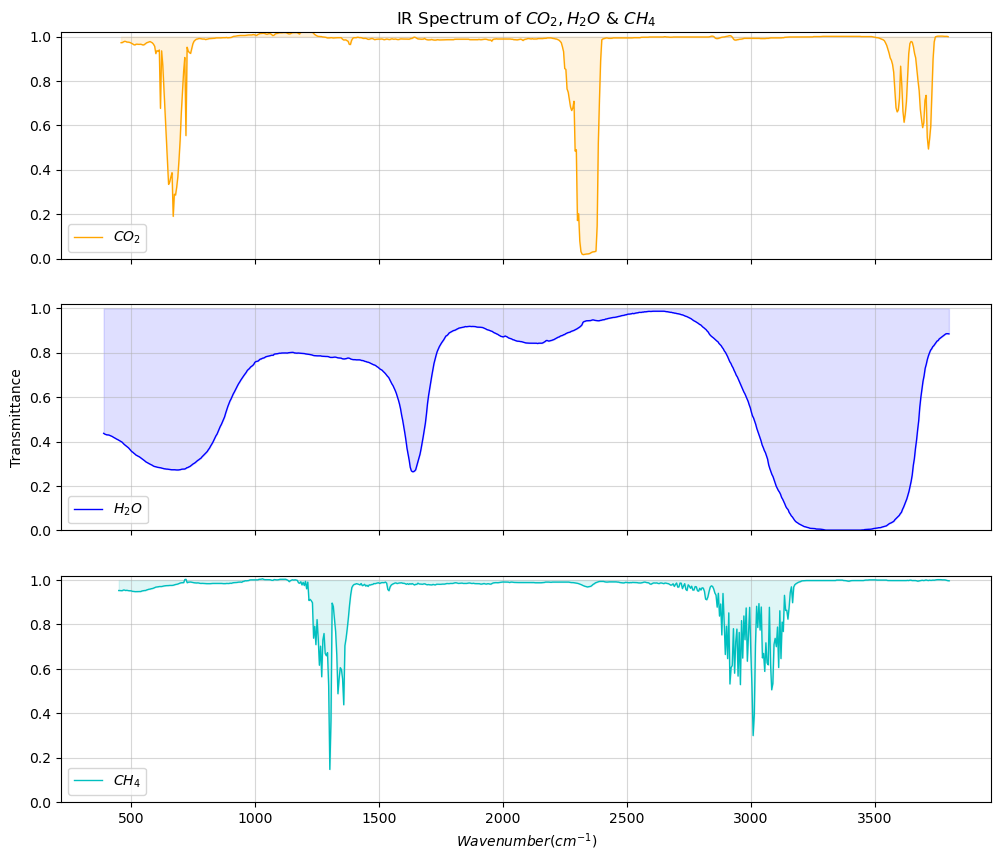

In [51]:
#read JDX format file and return array of IR data
def extract_IR(chem):
    import numpy as np
    import glob
    
    numbers = []
    yvals = []
    xvals = []
    
    #reads the file, splits it by line and adds each row to numbers
    with open(f"{chem}.jdx", 'r') as file:
        data = file.read()
        data = data.split("\n") #data here is a list
        for line in data:
            line = line.strip('#')
            if line == '':
                continue
            if line[0].isdigit():
                numbers.append(line)
                
#after adding to the numbers list, I'll append all the data into lists so it can be used to make the graphs :D
    for row in numbers:
        row = row.split(' ', 5) 
        row = np.array(row) 
        row = row.astype(float) 
        xvals.append(row[0])
        yval = np.sum(row[1:])/(len(row)-1)
        yvals.append(yval)
    
    return xvals, yvals


#time to plot for each compound
import matplotlib as plt
from matplotlib import pyplot as plt

cmpds = ['carbon_dioxide', 'water', 'methane']
chemnames = [r'$CO_2$', r'$H_{2}O$', r'$CH_{4}$']
colours = ['orange','b','c']

fig, axes = plt.subplots(nrows=3, ncols=1,
                         figsize=(12, 10), sharex='col')
axes[0].set_title('IR Spectrum of ' r'$CO_{2}, H_{2}O$' ' & ' r'$CH_{4}$')
axes[1].set_ylabel('Transmittance')
axes[2].set_xlabel(r'$Wavenumber(cm^{-1})$')

for i in range(len(cmpds)):
    cmpd_x = extract_IR(cmpds[i])[0]
    cmpd_y = extract_IR(cmpds[i])[1]

    axes[i].plot(cmpd_x, cmpd_y, color=colours[i], label=chemnames[i], linewidth=1)
    axes[i].fill_between(cmpd_x, cmpd_y, 1, color=colours[i], alpha=.125)
    axes[i].set_ylim([0.0, 1.02])
    axes[i].legend(loc='lower left', frameon=True)

# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)
    
plt.show()